<a href="https://colab.research.google.com/github/MazurovaNN/theory_ver/blob/main/DZ8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

Задача 1 Даны значения величины заработной платы заемщиков банка (zp) и значения их
поведенческого кредитного скоринга (ks):

zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110],

ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832].

Найдите ковариацию этих двух величин с помощью элементарных действий, а затем с
помощью функции cov из numpy
Полученные значения должны быть равны.
Найдите коэффициент корреляции Пирсона с помощью ковариации и
среднеквадратичных отклонений двух признаков,
а затем с использованием функций из библиотек numpy и pandas.

In [4]:
zp=np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
ks=np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

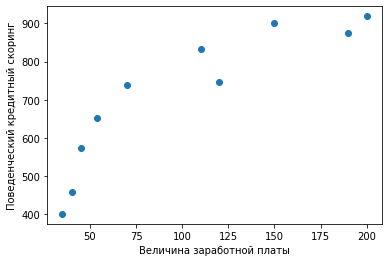

In [5]:
plt.scatter(zp,ks)
plt.xlabel('Величина заработной платы')
plt.ylabel('Поведенческий кредитный скоринг', rotation=90)
plt.show()

Проанализировав график, можно прийти к выводу, что зависимоть линенйная (прямая).

Следовательно, между данными существует выраженная положительная корреляция

Далее считаю ковариацию через математическое ожидание

In [6]:
cov=np.mean(zp*ks)-np.mean(zp)*np.mean(ks)
cov

9157.839999999997

Считаю ковариацию через смещенную функцию cov

In [7]:
cov2=np.cov(zp,ks,ddof=0)
cov2

array([[ 3494.64,  9157.84],
       [ 9157.84, 30468.89]])

Рассчитываю коэффициент Пирсона через формулу смещенной ковариации

In [8]:
pear=cov/(zp.std(ddof=0)*ks.std(ddof=0))
pear

0.8874900920739158

С использованием функций из библиотеки numpy

In [9]:
pear_np=np.corrcoef(zp, ks)
pear_np

array([[1.        , 0.88749009],
       [0.88749009, 1.        ]])

С использованием функций из библиотеки pandas

In [10]:
df=pd.DataFrame(data={'zp':zp, 'ks':ks})
df.corr()

,zp,ks
zp,1.00000,0.88749
ks,0.88749,1.00000


# Вывод:
 между исходными данными существует сильная линейная взаимосвязь 

Задача 2 Измерены значения IQ выборки студентов,
обучающихся в местных технических вузах:

131, 125, 115, 122, 131, 115, 107, 99, 125, 111.

Известно, что в генеральной совокупности IQ распределен нормально.
Найдите доверительный интервал для математического ожидания с надежностью 0.95.

In [11]:
iq=np.array([131, 125, 115, 122, 131, 115, 107, 99, 125, 111])

Так как по условию задачи не известны: математическое ожидание генеральной совокупности, среднее квадратическое отклонение для генеральной совокупности, значит для расчета доверительного интервала буду использовать t-критерий

In [12]:
n=iq.size
std=iq.std(ddof=1)
mean=iq.mean()
print(f'Среднее выборочное: {mean:.2f},\n'
      f'Размер выборки n=: {n},\n'
      f'Среднее квадратическое отклонение по выборке(несмещенное): {std:.2f}.'
     )

Среднее выборочное: 118.10,
Размер выборки n=: 10,
Среднее квадратическое отклонение по выборке(несмещенное): 10.55.


Далее считаю значения t и отклонение

In [13]:
t=stats.t.ppf((1+0.95)/2,n-1)
d=t*std/(n)**.5
d,t

(7.543916348412745, 2.2621571627409915)

Считаю доверительный интервал для математического ожидания с надежностью 0.95.

In [14]:
a=mean-d
b=mean+d
print(f'95%-й доверительный интервал для истинного значения IQ: [{a: .4f};{b: .4f}].')

95%-й доверительный интервал для истинного значения IQ: [ 110.5561; 125.6439].


Задача 3

Известно, что рост футболистов в сборной распределен нормально
с дисперсией генеральной совокупности, равной 25 кв.см. Объем выборки равен 27,
среднее выборочное составляет 174.2.

Найдите доверительный интервал для
математического
ожидания с надежностью 0.95.

Так как дисперсия генеральной совокупности задана, то для расчета доверительного интервала, буду использовать 
 z-критерий

In [15]:
var=25
std=(var)**.5
n=27
mean=174.2

Cчитаю значение z и отклонение

In [16]:
z=stats.t.ppf((1+0.95)/2,n-1)
d=z*std/(n)**.5
d,z

(1.977934124546103, 2.055529438642871)

In [17]:
a=mean-d
b=mean+d
print(f'95%-й доверительный интервал для оценки математического ожидания генеральной совокупности: [{a: .4f};{b: .4f}].')

95%-й доверительный интервал для оценки математического ожидания генеральной совокупности: [ 172.2221; 176.1779].
